Throughout this module, you dove deep into the topics of exploratory data analysis (EDA) and its sub-steps. Now, it's time to apply your knowledge.

In this challenge, you'll work with the Pima Indians Diabetes dataset from Kaggle. This data was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases. This dataset contains a subset of patient data from a larger database; in particular, it only contains female patients of Pima Indian heritage over the age of 21.

We will view this dataset through the lens of the following predictive problem: can we predict the likelihood that a patient has diabetes using various medical diagnostic measurements?

In this context:


Target/Response: "Outcome", which is 0/1 binary
Predictors: all other columns in the dataset (e.g., "Pregnancies", "Glucose", etc.), which are all numeric

You should access the data from the Thinkful database. Here are the credentials you can use to connect to the database:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'diabetes'
table_name = 'diabetes'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db,table_name))

diabetes_df = pd.read_sql_query('select * from diabetes',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


To complete this challenge, you'll answer a series of questions about the dataset, and then submit a Jupyter Notebook containing your solutions to the following tasks. In addition, you can also submit a kernel to the Kaggle community containing your solutions if you wish.

Your goals in this challenge include validating the data, identifying potential data integrity issues, and identifying basic relationships between the target and provided predictors through EDA.

First, load the dataset and do some basic EDA.

In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        763 non-null    int64  
 1   glucose            763 non-null    int64  
 2   blood_pressure     763 non-null    int64  
 3   skin_thickness     763 non-null    int64  
 4   insulin            763 non-null    int64  
 5   bmi                763 non-null    float64
 6   diabetes_pedigree  763 non-null    float64
 7   age                763 non-null    int64  
 8   outcome            763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


In [6]:
diabetes_df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,5,44,62,0,0,25.0,0.587,36,0
1,2,56,56,28,45,24.2,0.332,22,0
2,9,57,80,37,0,32.8,0.096,41,0
3,0,57,60,0,0,21.7,0.735,67,0
4,3,61,82,28,0,34.4,0.243,46,0


Detecting missing values

In [8]:
diabetes_df.isnull().sum()

pregnancies          0
glucose              0
blood_pressure       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
age                  0
outcome              0
dtype: int64

Detecting outliers

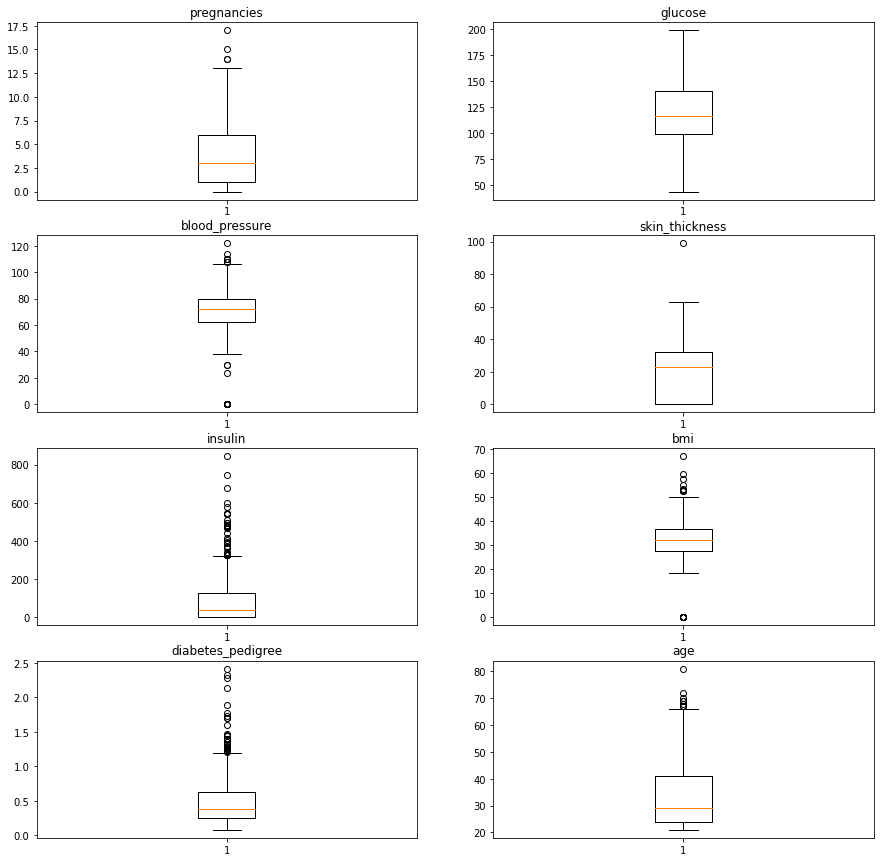

In [9]:
plt.figure(figsize=(15,15))
for i,col in enumerate(diabetes_df.columns[:-1]):
  plt.subplot(4,2,i+1)
  plt.boxplot(diabetes_df[col])
  plt.title(col)



Dealing outliers using winsorization

In [10]:
plt.figure(figsize=(15,15))
for i,col in enumerate(diabetes_df.columns[:-1]):
  diabetes_df['winsorized_'+str(col)]=winsorize(diabetes_df[col],(0,0.10))
 



<Figure size 1080x1080 with 0 Axes>

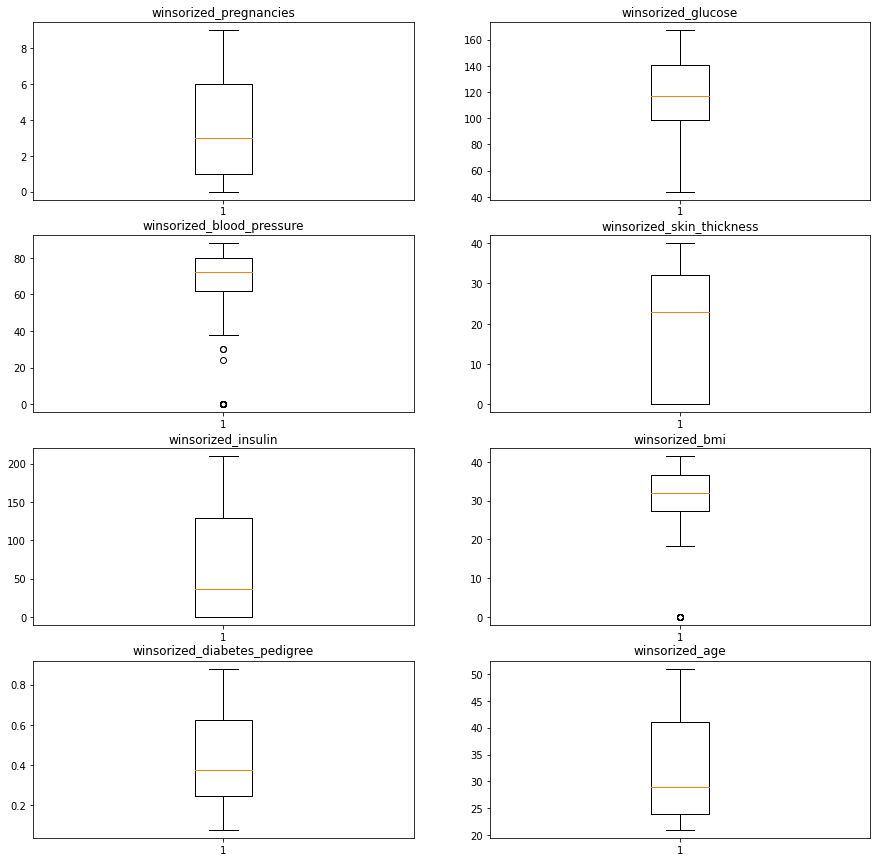

In [11]:
plt.figure(figsize=(15,15))
for i,col in enumerate(diabetes_df.columns[9:]):
  plt.subplot(4,2,i+1)
  plt.boxplot(diabetes_df[col])
  plt.title(col)

In [12]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome,winsorized_pregnancies,winsorized_glucose,winsorized_blood_pressure,winsorized_skin_thickness,winsorized_insulin,winsorized_bmi,winsorized_diabetes_pedigree,winsorized_age
0,5,44,62,0,0,25.0,0.587,36,0,5,44,62,0,0,25.0,0.587,36
1,2,56,56,28,45,24.2,0.332,22,0,2,56,56,28,45,24.2,0.332,22
2,9,57,80,37,0,32.8,0.096,41,0,9,57,80,37,0,32.8,0.096,41
3,0,57,60,0,0,21.7,0.735,67,0,0,57,60,0,0,21.7,0.735,51
4,3,61,82,28,0,34.4,0.243,46,0,3,61,82,28,0,34.4,0.243,46


Explore the data using univariate and multivariate exploration techniques. Be sure to pay special attention to your target variable. In this regard, focus on finding the relevant variables that may affect the likelihood of having diabetes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


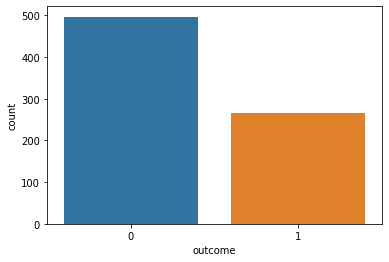

In [13]:
sns.countplot(diabetes_df['outcome'])

The outcome variable is unbalanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


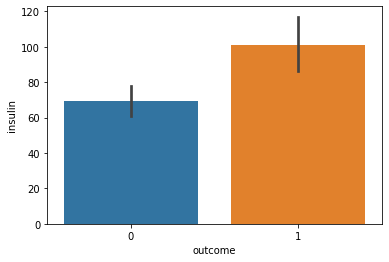

In [15]:
sns.barplot(diabetes_df['outcome'],diabetes_df['insulin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


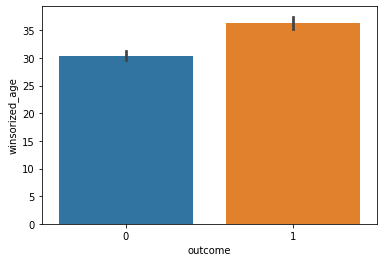

In [16]:
sns.barplot(diabetes_df['outcome'],diabetes_df['winsorized_age'])

In [33]:
corr=diabetes_df.corr()
corr

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome,winsorized_pregnancies,winsorized_glucose,winsorized_blood_pressure,winsorized_skin_thickness,winsorized_insulin,winsorized_bmi,winsorized_diabetes_pedigree,winsorized_age
pregnancies,1.000000,0.128135,0.140481,-0.082435,-0.074960,0.014874,-0.036063,0.542558,0.218877,0.979282,0.135297,0.134680,-0.074383,-0.093891,0.034494,-0.019382,0.602438
glucose,0.128135,1.000000,0.158429,0.075178,0.331550,0.235666,0.137246,0.267136,0.494650,0.136368,0.987727,0.151792,0.058216,0.269914,0.235503,0.107269,0.272587
blood_pressure,0.140481,0.158429,1.000000,0.207590,0.088731,0.280781,0.040426,0.239038,0.063602,0.146254,0.162914,0.988449,0.207055,0.104782,0.283473,0.037969,0.255632
skin_thickness,-0.082435,0.075178,0.207590,1.000000,0.440858,0.391542,0.183840,-0.114804,0.072382,-0.100633,0.066907,0.221702,0.983551,0.522209,0.392559,0.178377,-0.100866
insulin,-0.074960,0.331550,0.088731,0.440858,1.000000,0.199216,0.184461,-0.043845,0.131870,-0.076866,0.326194,0.100283,0.454543,0.889716,0.206065,0.178821,-0.037440
bmi,0.014874,0.235666,0.280781,0.391542,0.199216,1.000000,0.139227,0.033258,0.289297,-0.004113,0.241363,0.271659,0.375181,0.210554,0.973879,0.135948,0.073508
diabetes_pedigree,-0.036063,0.137246,0.040426,0.183840,0.184461,0.139227,1.000000,0.030896,0.172292,-0.039157,0.124359,0.048579,0.171156,0.192574,0.129640,0.913201,0.036773
age,0.542558,0.267136,0.239038,-0.114804,-0.043845,0.033258,0.030896,1.000000,0.235145,0.555330,0.267541,0.230063,-0.130924,-0.088950,0.048534,0.041402,0.973767
outcome,0.218877,0.494650,0.063602,0.072382,0.131870,0.289297,0.172292,0.235145,1.000000,0.217819,0.491548,0.055127,0.060892,0.112971,0.280012,0.177958,0.281775
winsorized_pregnancies,0.979282,0.136368,0.146254,-0.100633,-0.076866,-0.004113,-0.039157,0.555330,0.217819,1.000000,0.141003,0.141680,-0.091809,-0.101007,0.015671,-0.021836,0.612629


Heat map

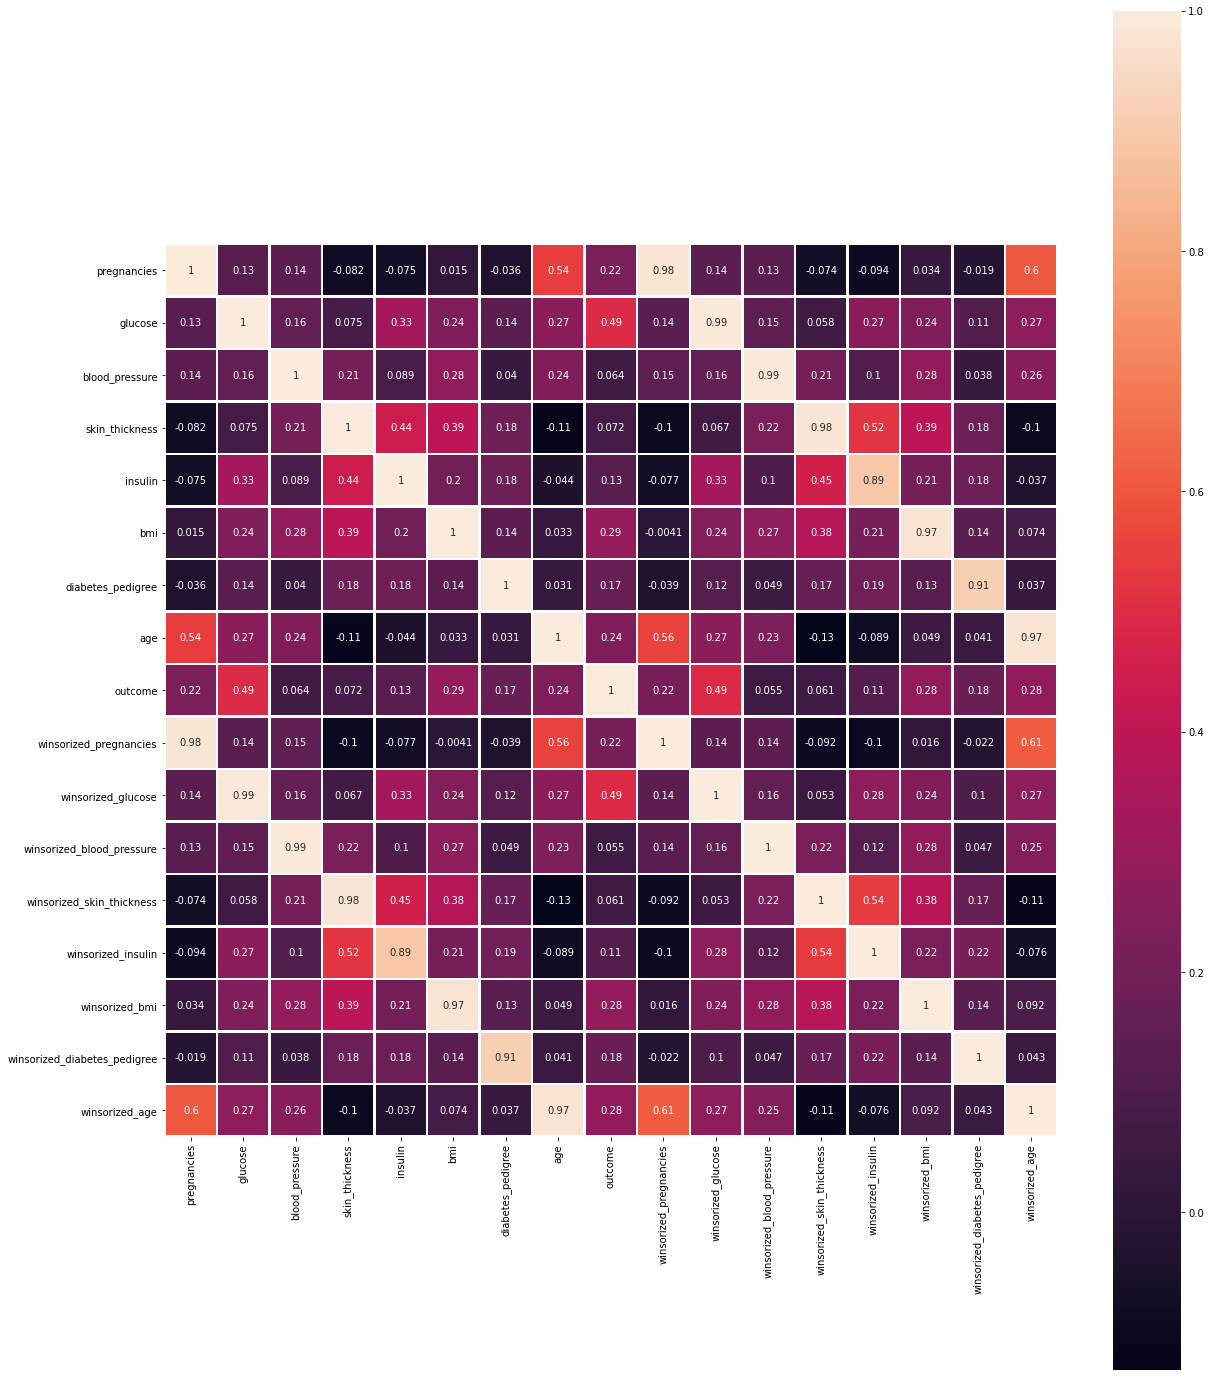

In [22]:
plt.figure(figsize=(20,25))
sns.heatmap(corr,annot=True,square=True,linewidths=1.5)

In [34]:
  to_drop = [column for column in corr if any(corr > 0.95)]
  for i in to_drop:
    print(i)
 


pregnancies
glucose
blood_pressure
skin_thickness
insulin
bmi
diabetes_pedigree
age
outcome
winsorized_pregnancies
winsorized_glucose
winsorized_blood_pressure
winsorized_skin_thickness
winsorized_insulin
winsorized_bmi
winsorized_diabetes_pedigree
winsorized_age
